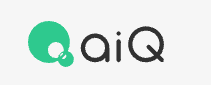

[disclaimer](./disclaimer.txt/)

# Load FACTSET Consensus Estimate data.
This sample show how to achieve the following operation with a simple interface

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from symbols, package and freq.

#### Find out factset symbols first from tickers

In [2]:
handler.load(
    data_source,
    data_type="symbol_lookup",
    ticker="GOOG-US",
    exchange_code="NAS",
    pick_only_primary=True
).retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,WFJYTJ-R,DC1QVX-S,0FPWZZ-E,GOOG-US,Alphabet Inc. Class C,NAS,USD,BBG009S3NB30,GOOG US


####  Load the data to memory  
> Set data_type = 'fundamental_estimates' for loading consensus estimates

In [3]:
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,DPS,USD,3,0.0,0.0,2,0.0,0.0,0.0,0,0,2019-04-30,2019-07-25,2022-07-18,2019-12-31
1,WFJYTJ-R,DPS,USD,8,0.0,0.0,2,0.0,0.0,0.0,0,0,2018-04-24,2018-07-23,2022-07-18,2020-03-31
2,WFJYTJ-R,DPS,USD,5,0.0,0.0,2,0.0,0.0,0.0,0,0,2019-02-05,2019-04-29,2022-07-18,2020-03-31
3,WFJYTJ-R,DPS,USD,4,0.0,0.0,2,0.0,0.0,0.0,0,0,2019-04-30,2019-07-25,2022-07-18,2020-03-31
4,WFJYTJ-R,DPS,USD,3,0.0,0.0,2,0.0,0.0,0.0,0,0,2019-07-26,2019-10-28,2022-07-18,2020-03-31


#### Narrow down output by specifying optional parameters
- `fields`: shrink by fundamental item names
- `start_datetime` and `end_datetime`: shrink by fundamental data releases

#### Specifying releases

In [4]:
# Get 'sales' and 'EPS' items only.
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    fields=["SALES", "EPS"],
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,3,1.703600,1.710000,43,1.33,1.86,0.086714,21,6,2024-03-15,2024-03-22,2022-07-18,2024-09-30
1,WFJYTJ-R,EPS,USD,4,1.902961,1.898167,42,1.34,2.21,0.128164,19,8,2024-03-15,2024-03-22,2022-07-18,2024-12-31
2,WFJYTJ-R,SALES,USD,3,77956.693273,77923.500000,14,74500.00,80526.00,1424.707812,5,1,2023-09-16,2023-10-01,2022-07-18,2024-03-31
3,WFJYTJ-R,SALES,USD,6,94279.104937,95415.900000,14,86162.00,97246.00,3088.957290,8,1,2023-09-16,2023-10-01,2022-07-18,2024-12-31
4,WFJYTJ-R,SALES,USD,5,84266.739001,84695.100000,14,78179.00,86595.00,2098.729593,9,1,2023-08-18,2023-10-01,2022-07-18,2024-09-30


#### Specifying release timings

In [5]:
# Get records for 2021 and 2022. See `fiscal_period_end_date` column.
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3,
    start_datetime='2021-01-01',
    end_datetime='2022-12-31'
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,SALES,USD,1,77538.088169,76921.00,34,73799.0000,92359.00,3027.119742,1,30,2022-10-26,2022-10-27,2022-07-18,2022-12-31
1,WFJYTJ-R,EPS,USD,2,1.383047,1.37,40,1.0475,1.89,0.137638,0,19,2022-07-18,2022-07-18,2022-07-18,2022-09-30
2,WFJYTJ-R,EPS,USD,2,1.380134,1.37,40,1.0475,1.89,0.139649,0,19,2022-07-19,2022-07-19,2022-07-18,2022-09-30
3,WFJYTJ-R,SALES,USD,3,56522.842933,56350.50,30,53538.0000,59729.00,1457.717852,3,0,2021-04-20,2021-04-20,2022-07-18,2021-09-30
4,WFJYTJ-R,SALES,USD,2,80517.008022,80390.50,32,76822.0000,92359.00,2803.084487,1,27,2022-09-28,2022-09-29,2022-07-18,2022-12-31
